# Draw on Images - Part 2

În cadrul lecție precedente am învățat cum anume să desenăm anumite forme geometrice pe o imagine. În lecția curentă o să trecem la scirerea de text pe imagini și la partea de desenat de poligoane.

In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
blank_image = np.zeros(shape=(512, 512, 3), dtype=np.int32)

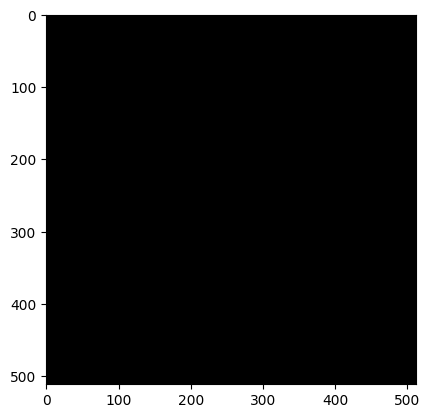

In [3]:
plt.imshow(blank_image)

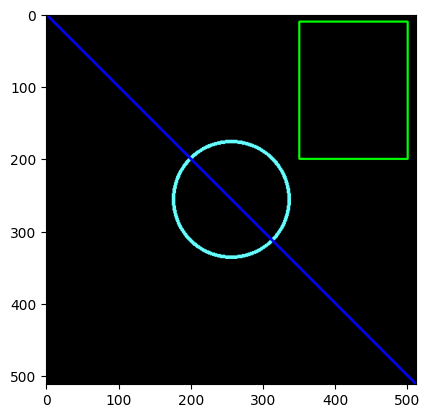

In [5]:
# Recap
cv2.rectangle(img=blank_image, pt1=(350, 10), pt2=(500, 200), color=(0, 255, 0), thickness=2)
cv2.circle(img=blank_image, center=(256, 256), radius=80, color=(102, 255, 255), thickness=3)
cv2.line(img=blank_image, pt1=(0, 0), pt2=(512, 512), color=(0, 0, 255), thickness=2)
plt.imshow(blank_image)

O să trecem acuma la partea în care o să scriem un text pe aceste imagini. Pentru asta la început trebuie să ne alegem fontul cu care scriem și putem alege doar din cele care sunt disponibile în OpenCV. Acestea le putem accesa cu cv2.FONT_ urmat de numele fontului. Acestea nu sunt cele mai plăcute font-uri disponibile, dar o să lucrăm cu acestea.

In [6]:
font = cv2.FONT_HERSHEY_SIMPLEX

După ce ne-am ales font-ul putem începem să utilizăm metoda care se va ocupa de partea de scriere pe imagine. Metoda respectivă poartă denumirea de 'cv2.putText()'. Ca și argumente are nevoie de:

1. img = imaginea pe care să scrie

2. text = textul care să fie scrie pe imagine

3. org = originea textului. Unde pe imagine să apară textul. Acest parametru reprezintă colțul din stânga jos al scrisului.

4. fontFace = fontul pe care l-am ales

5. fontScale = mărimea fontului

6. color = culoare pe care să o aibă scrisul

7. thickness = grosimea scrisului

8. lineType = cv2.LINE_AA  # ar trebuie să se utilizeze cam tot timpul valoarea cv2.LINE_AA



O să scriem textul 'Hello' în partea stânga jos a imaginii pe care am desenat.

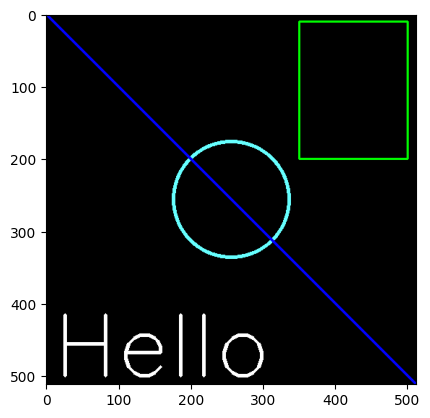

In [7]:
cv2.putText(img=blank_image, text='Hello', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 255), thickness=3, lineType=cv2.LINE_AA)
plt.imshow(blank_image)

O să trecem acuma la partea în care o să desenăm anumite poligoane pe o imagine. O să fie anumite momente atunci când o să fim nevoiți să desenăm anumite figuri sub formă de poligon (să încadrăm un semn de stop). Ca să putem desena un poligon trebuie să avem un array de vertexi. Acesta o să fie un array de tip numpy în care o să avem un nested list, iar fiecare element din acea listă o să reprezinte un vertex. Fiecare element din listă o să conțină valori pentru coordonatele X și Y. O să creem acest array de vertexi

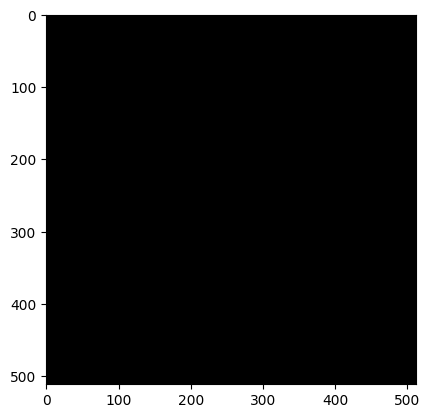

In [8]:
blank_image = np.zeros(shape=(512, 512, 3), dtype=np.int32)
plt.imshow(blank_image)

In [9]:
vertices = np.array([[100, 300], [200, 200], [400, 300], [200, 400]], dtype=np.int32)

In [10]:
vertices.shape

(4, 2)

Array-ul pe care l-am creat este un array în două dimensiuni. Știm că o imagine de cele mai multe ori (și cea de sus) este prezentă în trei dimensiuni, height, width și color channel. Array-ul pe care l-am creat noi nu corespunde cu un array cu care OpenCV poate să lucreze, din acest motiv trebuie să facem un rehsape la acest array pentru a fi în trei dimensuni. Pentru a face reshape la un array din două dimensiuni la unul în trei și pentru a nu își pierde datele o să se folosească următoarea linie de cod

In [11]:
points = vertices.reshape((-1, 1, 2))

In [12]:
points.shape

(4, 1, 2)

In [13]:
points

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

Acuma dacă ne uităm la variabila 'points' observăm faptul că aceasta este acum în trei dimesniuni și are valorile inițiale pe care le-am stabilit. Tot timpul când dorim să facem această trasformare o să folosim codul 'reshape((-1, 1, 2))', nu trebuie să înțelegem în spate cum funcționează, doar să știm că transformă un array din două dimensiuni în trei fără a îi schimba valorile și a le rearanja. Pentru a desena figura respectivă o să folosim metoda cv2.polylines() care are nevoie de următorii parametri:

1. img = imaginea pe care să se deseneze

2. pts = o listă cu punctele, vertexii formei (o să fie trecută ca și listă: [points])

3. isClosed = valoare booleană prin care specificăm dacă forma este închisă sau nu

4. color = culoarea formei

5. thickness = grosimea formei


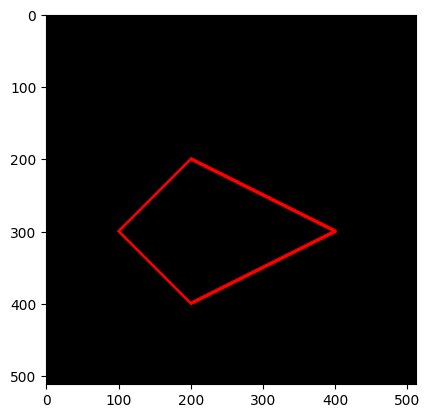

In [14]:
cv2.polylines(img=blank_image, pts=[points], isClosed=True, color=(255, 0, 0), thickness=3)
plt.imshow(blank_image)

## Recapitulare

În acest tutorial am învățat:

    1. Cum putem să scriem un text pe o imagine

        blank_image = np.zeros(shape=(512, 512, 3), dtype=np.int32)

        font = cv2.FONT_HERSHEY_SIMPLEX

        cv2.putText(img=blank_image, text='Hello', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 255), thickness=3, lineType=cv2.LINE_AA)

    2. Cum să desenăm un poligon pe o imagine

        2.1 Trebuie să ne creem un array de puncte

            vertices = np.array([[100, 300], [200, 200], [400, 300], [200, 400]], dtype=np.int32)

        2.2 Trebuie să facem reshape la acest array de valori

            points = vertices.reshape((-1, 1, 2))

        2.3 Desenăm poligonul

            cv2.polylines(img=blank_image, pts=[points], isClosed=True, color=(255, 0, 0), thickness=2)